## Letters Classification in Python

In [2]:
#import libraries
import time

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [10]:
#read in the data
data = pd.read_csv('letters.txt')
data.head()


,letter,xbox,ybox,width,high,pix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xege,xegevy,yege,yegvx
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7


In [11]:
# print(data.describe())

In [12]:
# data.info()

In [13]:
# data.boxplot()
# plt.show()
data.columns

Index(['letter', 'xbox', 'ybox', 'width', 'high', 'pix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xege', 'xegevy', 'yege',
       'yegvx'],
      dtype='object')

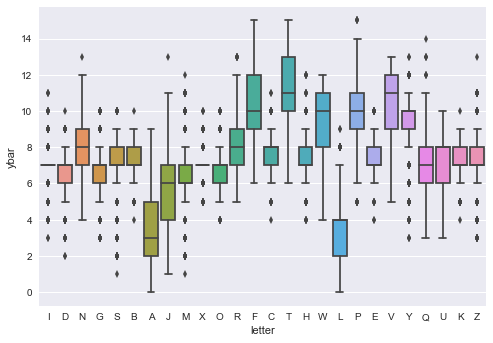

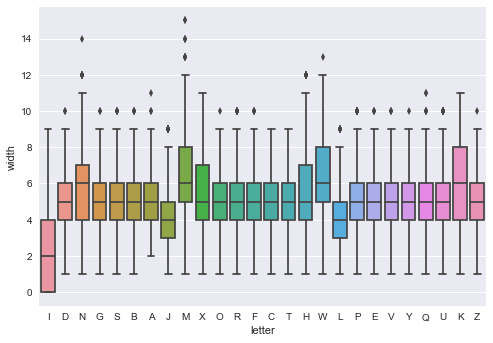

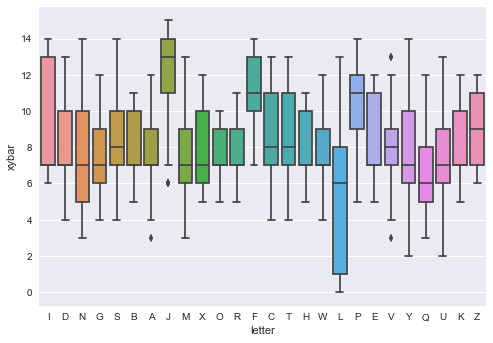

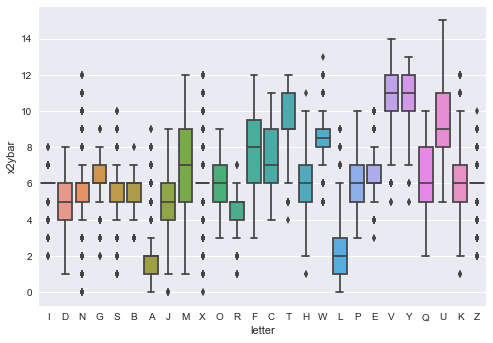

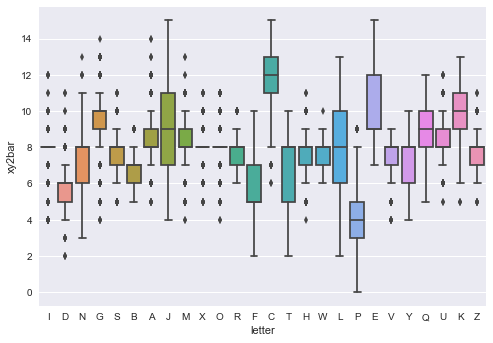

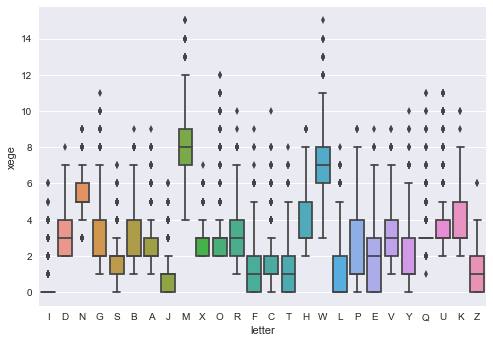

In [14]:
#quick summary statistics and plots
# letters.boxplot('letter',by='xbox')
# plt.show()

sns.boxplot(y='ybar',x='letter',data=data)
# # plt.savefig('ybar-box.png')
plt.show()
sns.boxplot(y='width',x='letter',data=data)
# plt.savefig('width-box.png')
plt.show()
sns.boxplot(y='xybar',x='letter',data=data)
# plt.savefig('xybar-box.png')
plt.show()
sns.boxplot(y='x2ybar',x='letter',data=data)
# plt.savefig('x2ybar-box.png')
plt.show()
sns.boxplot(y='xy2bar',x='letter',data=data)
# plt.savefig('xy2bar-box.png')
plt.show()
sns.boxplot(y='xege',x='letter',data=data)
# plt.savefig('xege-box.png')
plt.show()
# sns.despine()


In [15]:
# list(data.columns)

In [ ]:
# sns.pairplot(data)

In [16]:
#make test and train set for model
X = data.drop('letter',axis=1)
# X.head()
y = data.letter

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=13)


In [17]:
#fit the model
def my_model_train(model,X_tr,y_tr,X_tst,y_tst):
    train_start = time.time()
    model.fit(X_tr,y_tr)
    train_end = time.time()
    print('Training time:', train_end-train_start)
#     benchmark = sum(y)/len(y) #should work if y is a vector of 0s and 1s
    score = model.score(X_tst, y_tst)
    print('Score:',score)  
#     print('Benchmark:',  benchmark,'\n')

In [18]:
#different models
mod_RF = RandomForestClassifier()
mod_SVM = SVC()

In [19]:
my_model_train(mod_RF,X_train,y_train,X_test,y_test)

Training time: 0.28242921829223633
Score: 0.9336


In [20]:
my_model_train(mod_SVM,X_train,y_train,X_test,y_test)

Training time: 8.984399318695068
Score: 0.9704


Out of the box, it appears that SVM is better. Let's do a grid search of parameters to optimize this model.

In [ ]:
#parameters to tune
k_list = ['rbf']#,'linear']#,'poly']#,'sigmoid']#,'precomputed']
gam_list = ['auto']#,0.01,0.1,.5,1,10]
c_list = [10,11,12]#,10,50]
# deg_list = [1,2,3,4]#,5]

#all together
param_dict = dict(kernel=k_list,gamma=gam_list,C = c_list)#,degree=deg_list) 


#model
model = mod_SVM
# model = mod_RF

grid = GridSearchCV(cv=3,estimator=model, param_grid=param_dict)
start = time.time()
#Do I need to just use X_train and Y_train here? 
grid.fit(X,y)
end = time.time()
runtime = end-start
print('Minutes:',runtime/60)

In [ ]:

print("Best Score:",grid.best_score_)
# print("Kernel:",grid.best_estimator_.kernel)
# print("Gamma:",grid.best_estimator_.gamma)
# print("C:",grid.best_estimator_.C)
print('Best Params:',grid.best_params_)


In [ ]:
temp_mod = SVC(gamma='auto',C=11,kernel='rbf')
my_model_train(temp_mod,X_train,y_train,X_test,y_test)

In [ ]:
#notes of best models:

# Best Score: 0.9742987149357468
# Best Params: {'gamma': 'auto', 'kernel': 'rbf', 'C': 5}

# Best Score: 0.9747987399369968
# Best Params: {'C': 11, 'gamma': 'auto', 'kernel': 'rbf'}

In [ ]:
# make a confusion matrix and plot it (if possible)
from sklearn.metrics import confusion_matrix
import itertools


In [ ]:
#best model
model_best = SVC(gamma = 'auto', kernel = 'rbf', C = 11)
my_model_train(model_best,X_tr=X_train,y_tr=y_train,X_tst=X_test,y_tst=y_test)

#compute matrix
y_pred = model_best.predict(X_test)
cnf_matrix = confusion_matrix(y_test,y_pred)

# print(y_pred)
# print(y_test)
# print(np.sum(y_pred == y_test))
# print(cnf_matrix)

In [ ]:
print(y_test[0:5],'\n',y_pred[0:5])

In [ ]:
model_best.classes_

In [ ]:
model_best

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
#plot non_normalized confusion Matrix
# class_names = ['Bad','Good']
import string
class_names = list(string.ascii_lowercase)
class_names = list(model_best.classes_)

#make sure that the labels are correct

plt.figure(figsize=(16, 12))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()

In [ ]:
# pd.DataFrame(model_best.predict_proba(test), columns=model_best.classes_)
#doesn't work since we don't have probabilities

In [ ]:
# list(string.ascii_lowercase)

### Make an example visualization of an SVM
- split off the letters a,b,c, and d and classify those with xbar and ybar

In [ ]:
#make modified dataset
# mini_dat = data
# print(data.head(5))
# data.iloc[0,0:3]
mini_data = data[data['letter'].isin(['A','B','C'])][['letter','xbar','ybar']]#,['letter','xbar','ybar']]
# mini_data = mini_data[['letter','xbar','ybar']]
mini_data.head()

In [ ]:
mini_data.info()
mini_data.letter.describe()

In [ ]:
#plot the decision region
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier,test_idx = None, resolution = 0.02):
    #setup marker generator and color map
    markers = ['s','x','o','v','^']
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min,x1_max = X[:,0].min() - 1, X[:,0].max() + 1 #sepal length
    x2_min,x2_max = X[:,1].min() - 1, X[:,1].max() + 1 #petal length
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1,xx2,Z,alpha = 0.4,cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #plot all samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y==cl,0],y = X[y==cl,1],alpha = 0.8,c=cmap(idx),marker = markers[idx],label = cl)
      

In [ ]:
#set up a mini svm for visualization
predictors = mini_data.drop('letter',axis=1)
temp = mini_data.letter
empt = []
# print(temp)
for i in temp:
#     
    if i == 'A':
        i = 0
    elif i == 'B':
        i = 1
    else: 
        i = 2
    empt.append(i)    
target = empt
target[:5]

In [ ]:
#mini model
p1,p2,t1,t2 = train_test_split(predictors,target,test_size=0.25, random_state=123)
my_model_train(mod_SVM,p1,t1,p2,t2)
mini_mod = SVC().fit(predictors,target)

In [ ]:
# plot_decision_regions(X = np.array(predictors), y = np.array(target), classifier=model_best)
plot_decision_regions(X = np.array(predictors), y = np.array(target), classifier=mini_mod)
plt.xlabel('xbar')
plt.ylabel('ybar')
plt.legend(loc = 'upper right')
plt.show()